In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import avo_func as avo
%matplotlib inline

### Elastic properties for AVO classes
The cell below defines the elastic properties for AVO classes compiled by [Alessandro del Monte](http://nbviewer.ipython.org/github/aadm/geophysical_notes/blob/master/avo_explorer_v2_mono.ipynb). Originally, Class IV is from Castagna & Swan (1997) "Principles of AVO crossplotting" (1997) and the others from Hilterman (2001) "Seismic Amplitude Interpretation".

In [2]:
shale = np.array([[3094,1515,2.40], [2643,1167,2.29], [2192,818,2.16], [3240,1620,2.34]])
sandgas = np.array([[4050,2526,2.21], [2781,1665,2.08], [1542,901,1.88], [1650,1090,2.07]])
sandbrine = np.array([[4115,2453,2.32], [3048,1595,2.23], [2134,860,2.11], [2590,1060,2.21]])
avocl=['Class I','Class II','Class III','Class IV']

angle = np.arange(0,41,1)

### 3 layers: shale / sand gas / shale

In [3]:
#approximations at the top from class I to IV
It1,Gt1,shueyt1,_ = avo.shuey(shale[0,0],shale[0,1],shale[0,2],sandgas[0,0],sandgas[0,1],sandgas[0,2],angle)
It2,Gt2,shueyt2,_ = avo.shuey(shale[1,0],shale[1,1],shale[1,2],sandgas[1,0],sandgas[1,1],sandgas[1,2],angle)
It3,Gt3,shueyt3,_ = avo.shuey(shale[2,0],shale[2,1],shale[2,2],sandgas[2,0],sandgas[2,1],sandgas[2,2],angle)
It4,Gt4,shueyt4,_ = avo.shuey(shale[3,0],shale[3,1],shale[3,2],sandgas[3,0],sandgas[3,1],sandgas[3,2],angle)


#approximations at the base from class I to IV
Ib1,Gb1,shueyb1,_ = avo.shuey(sandgas[0,0],sandgas[0,1],sandgas[0,2],shale[0,0],shale[0,1],shale[0,2],angle)
Ib2,Gb2,shueyb2,_ = avo.shuey(sandgas[1,0],sandgas[1,1],sandgas[1,2],shale[1,0],shale[1,1],shale[1,2],angle)
Ib3,Gb3,shueyb3,_ = avo.shuey(sandgas[2,0],sandgas[2,1],sandgas[2,2],shale[2,0],shale[2,1],shale[2,2],angle)
Ib4,Gb4,shueyb4,_ = avo.shuey(sandgas[3,0],sandgas[3,1],sandgas[3,2],shale[3,0],shale[3,1],shale[3,2],angle)

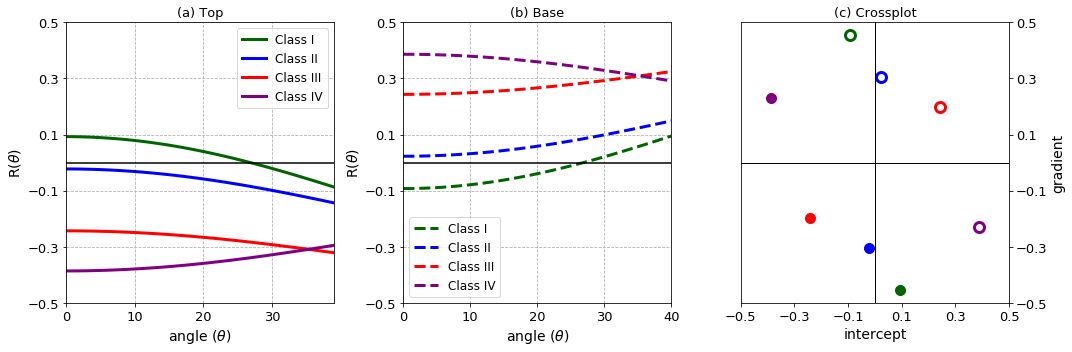

In [4]:
mxplot=0.5

fig=plt.figure(figsize=(15,5))

ax=plt.subplot(1,3,1)
plt.title('(a) Top',fontsize=13)
plt.plot(angle,shueyt1,'-',color='darkgreen',label='Class I',linewidth=3)
plt.plot(angle,shueyt2,'-',color='blue',label='Class II',linewidth=3)
plt.plot(angle,shueyt3,'-',color='red',label='Class III',linewidth=3)
plt.plot(angle,shueyt4,'-',color='purple',label='Class IV',linewidth=3)

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)', fontsize=14)
ax.set_ylabel('R($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
plt.yticks(yt)
plt.xlim(0.,np.max(angle-1))
plt.ylim(-mxplot,mxplot)
plt.legend(fontsize='large')
ax.tick_params(labelsize=13)
plt.grid(linestyle='--')

ax=plt.subplot(1,3,2)
plt.title('(b) Base',fontsize=13)
plt.plot(angle,shueyb1,'--',color='darkgreen',label='Class I',linewidth=3)
plt.plot(angle,shueyb2,'--',color='blue',label='Class II',linewidth=3)
plt.plot(angle,shueyb3,'--',color='red',label='Class III',linewidth=3)
plt.plot(angle,shueyb4,'--',color='purple',label='Class IV',linewidth=3)

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)', fontsize=14)
ax.set_ylabel('R($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
plt.yticks(yt)
plt.xlim(0.,np.max(angle))
plt.ylim(-mxplot,mxplot)
plt.legend(fontsize='large')
ax.tick_params(labelsize=13)
plt.grid(linestyle='--')

ax=plt.subplot(1,3,3)
plt.title('(c) Crossplot',fontsize=13)
ax.plot(It1,Gt1,'o',color='darkgreen',markersize=10)
ax.plot(It2,Gt2,'o',color='blue',markersize=10)
ax.plot(It3,Gt3,'o',color='red',markersize=10)
ax.plot(It4,Gt4,'o',color='purple',markersize=10)

ax.plot(Ib1,Gb1,'o',mfc='none',mew=3,color='darkgreen',markersize=10)
ax.plot(Ib2,Gb2,'o',mfc='none',mew=3,color='blue',markersize=10)
ax.plot(Ib3,Gb3,'o',mfc='none',mew=3,color='red',markersize=10)
ax.plot(Ib4,Gb4,'o',mfc='none',mew=3,color='purple',markersize=10)

ax.axhline(0, color='k', lw=1), ax.axvline(0, color='k', lw=1)
ax.set_xlabel('intercept', fontsize=14), ax.set_ylabel('gradient', fontsize=14)
ax.set_xlim(-mxplot,mxplot), ax.set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,6)
xt=np.linspace(-mxplot,mxplot,6)
ax.set_yticks(yt)
ax.set_xticks(xt)
ax.xaxis.set_label_position('bottom'), ax.xaxis.tick_bottom()
ax.yaxis.set_label_position('right'), ax.yaxis.tick_right()
ax.tick_params(labelsize=13)

plt.tight_layout()

#### Now I'll compute and plot the reflectivity, wavelet, normal incidence offset gather and angle gather. 

In [5]:
vp=np.zeros((300,4));vs=np.zeros((300,4));rho=np.zeros((300,4));NI=np.zeros((300,4))
anglegather=np.zeros((4,300,len(angle)))
for i in range(len(shale)):
    # the properties now will generate a log
    vp1 = np.zeros(100) + shale[i,0] #m/s
    vs1 = np.zeros(100) + shale[i,1]
    rho1 = np.zeros(100) + shale[i,2] #g/cc
    vp2 = np.zeros(100) + sandgas[i,0]
    vs2 = np.zeros(100) + sandgas[i,1] #m/s
    rho2 = np.zeros(100) + sandgas[i,2] #g/cc

    vp[:,i]=np.concatenate((vp1,vp2,vp1))
    vs[:,i]=np.concatenate((vs1,vs2,vs1))
    rho[:,i]=np.concatenate((rho1,rho2,rho1))

    ip=vp[:,i]*rho[:,i] #impedance
    rc=avo.reflect_coef(ip) #reflection coefficient - normal incidence
    #define the ricker wavelet
    freq=25
    length = 0.150
    dt = 0.001
    time,wavelet=avo.rickerwave(freq, length, dt)
    #normal incidence offset gather
    NI[:,i]=np.convolve(wavelet,rc,mode='same')
    #reflectivity on a interface
    reflect,r0,g=avo.shueyrc(vp[:,i],vs[:,i],rho[:,i],angle)
    #generate the angle gather
    gather=[]
    for j in range(len(angle)):
        gather.append(np.convolve(wavelet,reflect[:,j],mode='same'))
    anglegather[i]=np.asarray(gather).T

time2=np.arange(0,(len(ip))*dt,dt)

#### Plot of the wavelet

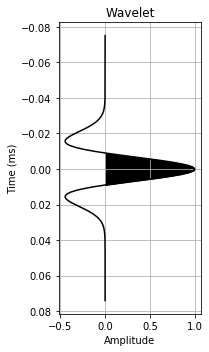

In [6]:
plt.figure(figsize=(3,5))
ax = plt.subplot(1,1,1)
plt.title('Wavelet')
plt.plot(wavelet,time,'k')
plt.fill_betweenx(time, wavelet, 0, wavelet > 0, color='k', alpha=1.0)
ax.invert_yaxis()
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Amplitude')
plt.grid(True)

plt.tight_layout()

#### Plot the normail incidence (NI)

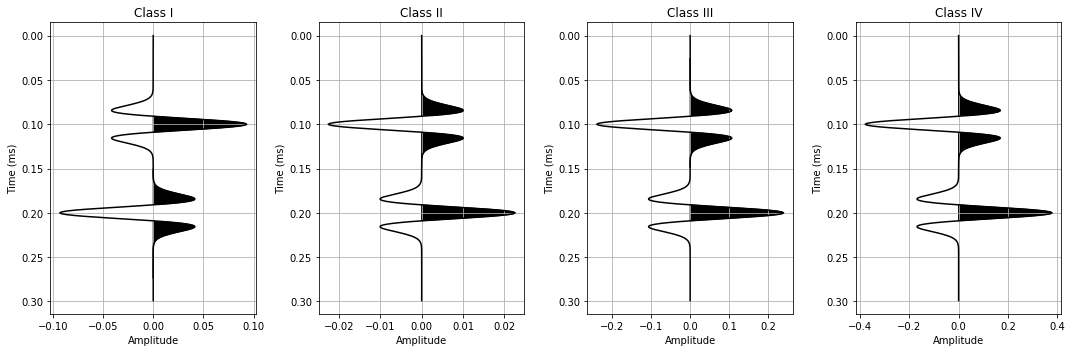

In [7]:
fig=plt.figure(figsize=(15,5))

for i in range(len(avocl)):
    ax = plt.subplot(1,4,i+1)
    plt.title(avocl[i])
    plt.plot(NI[:,i],time2,'k')
    plt.fill_betweenx(time2, NI[:,i], 0, NI[:,i] > 0, color='k', alpha=1.0)
    ax.invert_yaxis()
    ax.set_ylabel('Time (ms)')
    ax.set_xlabel('Amplitude')
    plt.grid(True)

plt.tight_layout()

#### Plot the angle gathers

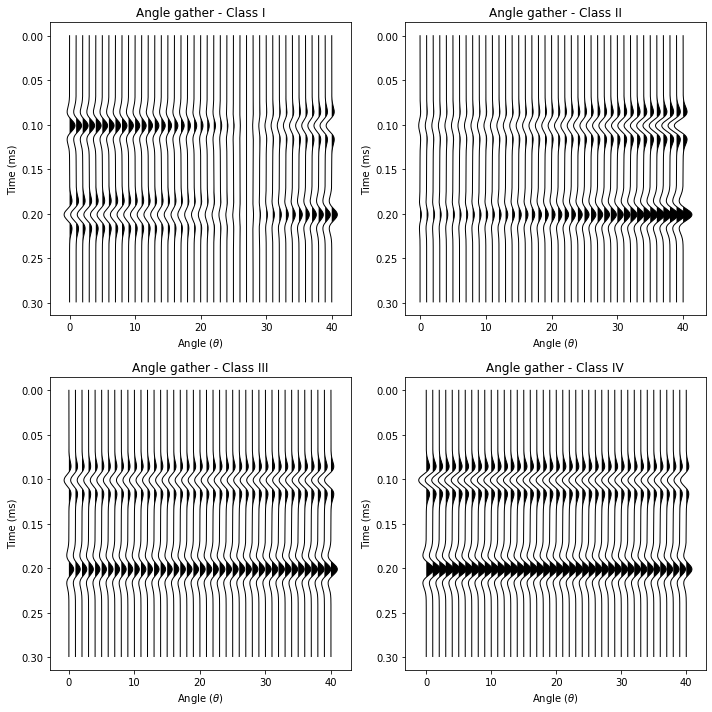

In [8]:
scale_factor=3. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
anglegatherplt[0]=anglegatherplt[0]*scale_factor # Twice just for the plot
anglegatherplt[1]=anglegatherplt[1]*scale_factor #Twice just for the plot
fig=plt.figure(figsize=(10,10))
for j in range(len(avocl)):
    ax = plt.subplot(2,2,j+1)
    plt.title('Angle gather - '+avocl[j])
    for i in range(len(angle)):
           ax.plot(i+anglegatherplt[j,:,i],time2,'k',linewidth=1)
           ax.fill_betweenx(time2,anglegatherplt[j,:,i]+i,i,
                            where=anglegatherplt[j,:,i]+i>i,facecolor='black')
    ax.invert_yaxis()
    ax.set_xlabel('Angle ($\\theta$)')
    ax.set_ylabel('Time (ms)')
    plt.tight_layout()

## The results in the above figure are consistents with the first figure.

### 3 layers: shale / sand brine / shale

In [9]:
#approximations at the top from class I to IV
It1,Gt1,shueyt1,_ = avo.shuey(shale[0,0],shale[0,1],shale[0,2],sandbrine[0,0],sandbrine[0,1],sandbrine[0,2],angle)
It2,Gt2,shueyt2,_ = avo.shuey(shale[1,0],shale[1,1],shale[1,2],sandbrine[1,0],sandbrine[1,1],sandbrine[1,2],angle)
It3,Gt3,shueyt3,_ = avo.shuey(shale[2,0],shale[2,1],shale[2,2],sandbrine[2,0],sandbrine[2,1],sandbrine[2,2],angle)
It4,Gt4,shueyt4,_ = avo.shuey(shale[3,0],shale[3,1],shale[3,2],sandbrine[3,0],sandbrine[3,1],sandbrine[3,2],angle)


#approximations at the base from class I to IV
Ib1,Gb1,shueyb1,_ = avo.shuey(sandbrine[0,0],sandbrine[0,1],sandbrine[0,2],shale[0,0],shale[0,1],shale[0,2],angle)
Ib2,Gb2,shueyb2,_ = avo.shuey(sandbrine[1,0],sandbrine[1,1],sandbrine[1,2],shale[1,0],shale[1,1],shale[1,2],angle)
Ib3,Gb3,shueyb3,_ = avo.shuey(sandbrine[2,0],sandbrine[2,1],sandbrine[2,2],shale[2,0],shale[2,1],shale[2,2],angle)
Ib4,Gb4,shueyb4,_ = avo.shuey(sandbrine[3,0],sandbrine[3,1],sandbrine[3,2],shale[3,0],shale[3,1],shale[3,2],angle)

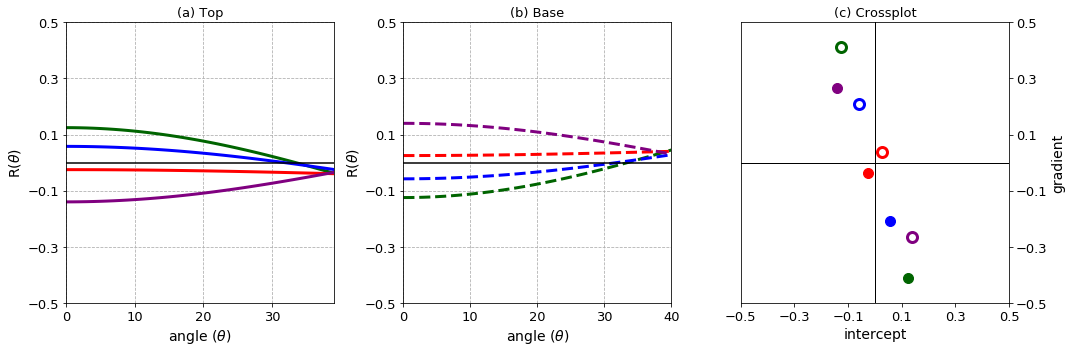

In [10]:
mxplot=0.5

fig=plt.figure(figsize=(15,5))

ax=plt.subplot(1,3,1)
plt.title('(a) Top',fontsize=13)
plt.plot(angle,shueyt1,'-',color='darkgreen',label='Class I',linewidth=3)
plt.plot(angle,shueyt2,'-',color='blue',label='Class II',linewidth=3)
plt.plot(angle,shueyt3,'-',color='red',label='Class III',linewidth=3)
plt.plot(angle,shueyt4,'-',color='purple',label='Class IV',linewidth=3)

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)', fontsize=14)
ax.set_ylabel('R($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
plt.yticks(yt)
plt.xlim(0.,np.max(angle-1))
plt.ylim(-mxplot,mxplot)
#plt.legend(fontsize='large')
ax.tick_params(labelsize=13)
plt.grid(linestyle='--')

ax=plt.subplot(1,3,2)
plt.title('(b) Base',fontsize=13)
plt.plot(angle,shueyb1,'--',color='darkgreen',label='Class I',linewidth=3)
plt.plot(angle,shueyb2,'--',color='blue',label='Class II',linewidth=3)
plt.plot(angle,shueyb3,'--',color='red',label='Class III',linewidth=3)
plt.plot(angle,shueyb4,'--',color='purple',label='Class IV',linewidth=3)

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)', fontsize=14)
ax.set_ylabel('R($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
plt.yticks(yt)
plt.xlim(0.,np.max(angle))
plt.ylim(-mxplot,mxplot)
#plt.legend(fontsize='large')
ax.tick_params(labelsize=13)
plt.grid(linestyle='--')

ax=plt.subplot(1,3,3)
plt.title('(c) Crossplot',fontsize=13)
ax.plot(It1,Gt1,'o',color='darkgreen',markersize=10)
ax.plot(It2,Gt2,'o',color='blue',markersize=10)
ax.plot(It3,Gt3,'o',color='red',markersize=10)
ax.plot(It4,Gt4,'o',color='purple',markersize=10)

ax.plot(Ib1,Gb1,'o',mfc='none',mew=3,color='darkgreen',markersize=10)
ax.plot(Ib2,Gb2,'o',mfc='none',mew=3,color='blue',markersize=10)
ax.plot(Ib3,Gb3,'o',mfc='none',mew=3,color='red',markersize=10)
ax.plot(Ib4,Gb4,'o',mfc='none',mew=3,color='purple',markersize=10)

ax.axhline(0, color='k', lw=1), ax.axvline(0, color='k', lw=1)
ax.set_xlabel('intercept', fontsize=14), ax.set_ylabel('gradient', fontsize=14)
ax.set_xlim(-mxplot,mxplot), ax.set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,6)
xt=np.linspace(-mxplot,mxplot,6)
ax.set_yticks(yt)
ax.set_xticks(xt)
ax.xaxis.set_label_position('bottom'), ax.xaxis.tick_bottom()
ax.yaxis.set_label_position('right'), ax.yaxis.tick_right()
ax.tick_params(labelsize=13)

plt.tight_layout()

### References:

Castagna, J. P., and H. W. Swan, 1997, Principles of AVO crossplotting: The Leading Edge, 16, no. 4, 337–342, http://dx.doi.org/10.1190/1.1437626.

Chopra, S., & Castagna, J. P., 2014. Avo. Society of Exploration Geophysicists.

Hilterman, F. J., 2001). Seismic amplitude interpretation: 2001 distinguished instructor short course (No. 4). SEG Books.

Shuey,R.T., 1985, A simplification of Zoeppritz equations: Geophysics, 50, 609–614.
 
https://github.com/aadm/avo_explorer